## Weaknesses of Monoalphabetic Ciphers

As early as the 9th century, the great weakness of monoalphabetic
ciphers (Caesar cipher) was recognized in the Islamic world. The
distribution of letters follows a specific but constant pattern in every
language. As explained in the last section, the letter 'e' is by far the
most common letter in the English language.

To demonstrate that this applies to any given (longer) texts, the text
of the 
<a href="https://thekingsbible.com/Bible/66/1" target="_blank">
Book of Revelations from the King James Bible
</a>
was analyzed. The resulting distribution of letters was plotted against
the distribution from the table. The result is shown in the figure
below.


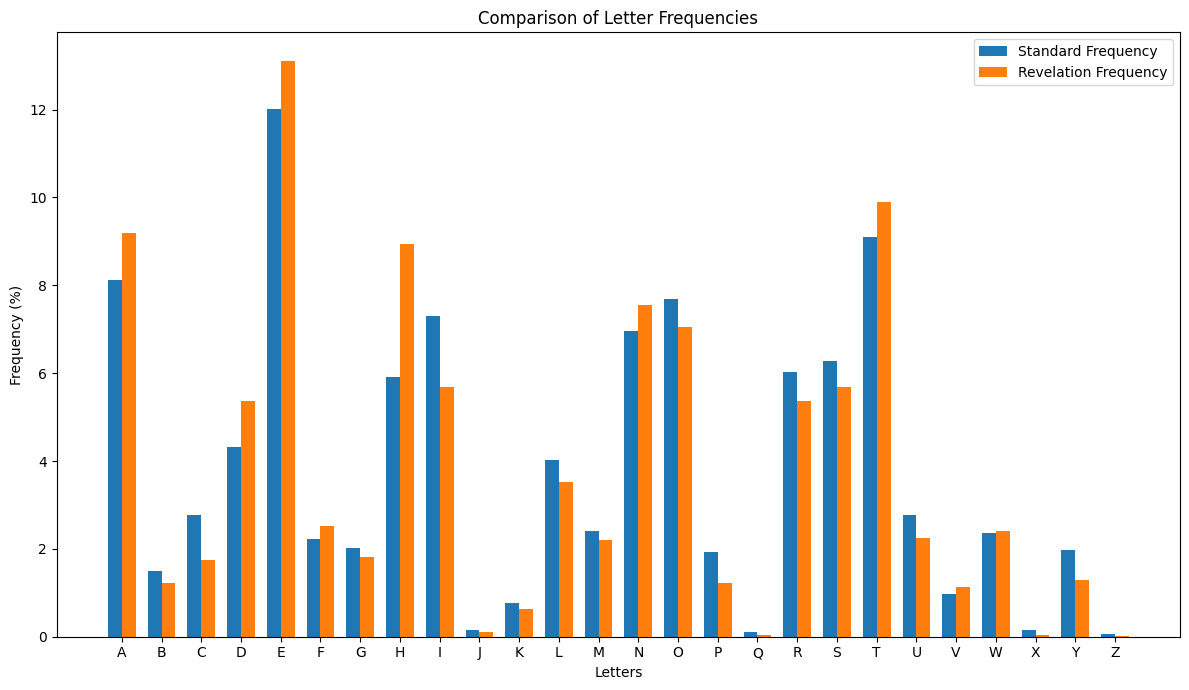

In [1]:
#| code-fold: true
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def file_reader(path : str) -> str:

    with open(path, mode='r', encoding='utf-8') as f:
        text = f.read()

    return text

def text_cleaning(text : str) -> str:
    clean = text.upper() \
                .replace('Ä', 'AE') \
                .replace('Ö', 'OE') \
                .replace('Ü', 'UE') \
                .replace('ß', 'SS') \
                .replace(' ', '') \

    cleaned_text = ''

    for c in clean:
        if c.isalpha():
            cleaned_text += c
    
    return cleaned_text

def file_writer(path : str, text : str) -> None:
    i = 0
    grouped_text = ""
    for c in text:
        i += 1
        if i % 50 == 0:
            grouped_text += c + "\n"
        elif i % 5 == 0:
            grouped_text += c + " "
        else:
            grouped_text += c
        
    with open(path, mode='w', encoding='utf-8') as f:
        f.write(grouped_text)
        
revelation = file_reader('revelation.txt')
cleaned_revelation = text_cleaning(revelation)
file_writer('cleaned_revelation.txt', cleaned_revelation)

def letter_frequency(text: str) -> dict:
    frequency = {}
    total_letters = 0
    
    for char in text:
        if char not in frequency:
            frequency[char] = 1
        else:
            frequency[char] += 1
        total_letters += 1
        
    for key, value in frequency.items():
        frequency[key] = (value / total_letters) * 100
        
           
    return frequency

frequency_revelation = letter_frequency(cleaned_revelation)


standard_frequency = {
    'E': 12.02,
    'T': 9.10,
    'A': 8.12,
    'O': 7.68,
    'I': 7.31,
    'N': 6.95,
    'S': 6.28,
    'R': 6.02,
    'H': 5.92,
    'D': 4.32,
    'L': 4.03,
    'C': 2.78,
    'U': 2.76,
    'M': 2.41,
    'W': 2.36,
    'F': 2.23,
    'G': 2.02,
    'Y': 1.97,
    'P': 1.93,
    'B': 1.49,
    'V': 0.98,
    'K': 0.77,
    'J': 0.15,
    'X': 0.15,
    'Q': 0.10,
    'Z': 0.07
}

df = pd.DataFrame.from_dict([standard_frequency, frequency_revelation])
df.index = ['Standard Frequency', 'Revelation Frequency']
dft = df.T
dft = dft.sort_index()
dft['Standard Frequency'] = dft['Standard Frequency'].astype(float)
dft['Revelation Frequency'] = dft['Revelation Frequency'].astype(float)

# --- Erstellen Sie das Side-by-Side-Balkendiagramm ---
# Legen Sie die Breite der Balken fest
bar_width = 0.35

# Verwenden Sie den Index des transponierten DataFrames (dft)
x = np.arange(len(dft.index))

fig, ax = plt.subplots(figsize=(12, 7))

# Zeichnen Sie die Balken für die beiden Spalten aus dft
ax.bar(x - bar_width/2, dft['Standard Frequency'], bar_width, label='Standard Frequency')
ax.bar(x + bar_width/2, dft['Revelation Frequency'], bar_width, label='Revelation Frequency')

ax.set_xticks(x)
ax.set_xticklabels(dft.index)

ax.set_xlabel('Letters')
ax.set_ylabel('Frequency (%)')
ax.set_title('Comparison of Letter Frequencies')
ax.legend()
plt.tight_layout()

plt.show()

The graphic shows that for a text length of 57,891 letters, the distribution
in a literary text is almost identical to the general frequency distribution
in the English language.

The following graphic shows what happens to the distribution of letters when
the same text is encrypted with a Caesar cipher.

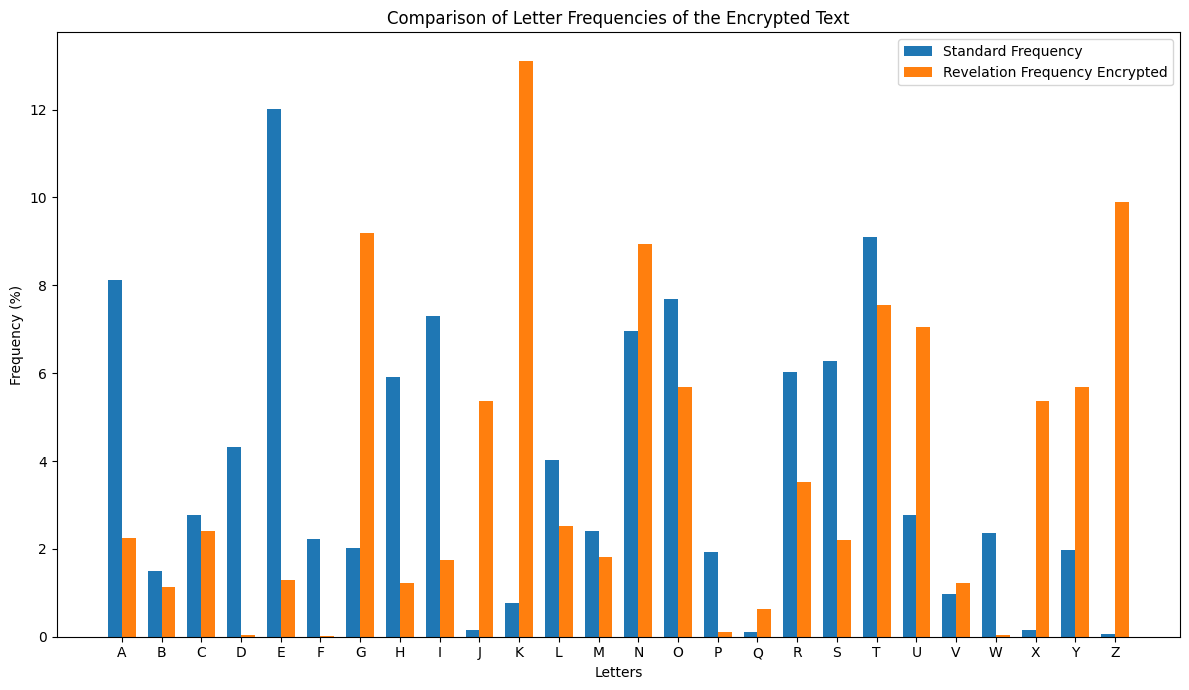

In [2]:
#| code-fold: true
def caesar(text : str, shift : int, encrypt=True) -> str:
    text = text.upper()
    result = ""
    
    if encrypt:
        for char in text:
            shifted = (ord(char) - ord('A') + shift) % 26 + ord('A')
            result += chr(shifted)
    else:
        for char in text:
            shifted = (ord(char) - ord('A') - shift) % 26 + ord('A')
            result += chr(shifted)
            
    return result


ciphered_revelation = caesar(cleaned_revelation, 6, encrypt=True)
frequency_enyrpyted_revelation = letter_frequency(ciphered_revelation)
dft['Revelation Frequency Encrypted'] = pd.Series(frequency_enyrpyted_revelation)

# --- Erstellen Sie das Side-by-Side-Balkendiagramm ---
# Legen Sie die Breite der Balken fest
bar_width = 0.35

# Verwenden Sie den Index des transponierten DataFrames (dft)
x = np.arange(len(dft.index))

fig, ax = plt.subplots(figsize=(12, 7))

# Zeichnen Sie die Balken für die beiden Spalten aus dft
ax.bar(x - bar_width/2, dft['Standard Frequency'], bar_width, label='Standard Frequency')
ax.bar(x + bar_width/2, dft['Revelation Frequency Encrypted'], bar_width, label='Revelation Frequency Encrypted')

ax.set_xticks(x)
ax.set_xticklabels(dft.index)

ax.set_xlabel('Letters')
ax.set_ylabel('Frequency (%)')
ax.set_title('Comparison of Letter Frequencies of the Encrypted Text')
ax.legend()
plt.tight_layout()

plt.show()

It is clearly visible that the distribution follows the same pattern -
shifted by six positions. This analysis allows the decryption of the
text without having to try all possible key alphabets.


## Vigenère Chiffre

The Vigenère Cipher is a polyalphabetic cipher. The method is named after
Blaise de Vigenère (1523 - 1596). Polyalphabetic means that not one
shift is used for encryption, but - changing after each letter - several
shifts are used.

To achieve this, a so-called Vigenère square is used as shown below.

![](vigenere_square_shading.svg)

To encrypt a plaintext, the Vigenère method requires a keyword. The
keyword should be as long as possible. The following example is intended to
show how the Vigenère method works. The plaintext to be encrypted is
'Cryptology is amazing' and the key is 'Buelrain'.  
As an aid, text and key are presented in a table.


```
cryptologyisamazing
buelrainbuelrainbue
```

The key is repeated without spaces until the letter sequence of the key is
as long as the letter sequence to be encrypted.

Next the letter to be encrypted is searched in the header of the Vigenère
square. This identifies the column with the shifted alphabet. The encrypted
letter is obtained by searching in the column with the row headers the letter
of the key located under the letter to be encrypted. The intersection of the
row with the previously found column corresponds to the encrypted
letter.

```
cryptologyisamazing
buelrainbuelrainbue

DLCAKOTBHSMDRMIMJHR
```

On a computer, the Vigenère cipher can be implemented by using modular
arithmetic. To do this, each letter is assigned a numerical value according to the
pattern $a = 0, b = 1, ... , z = 25$. The encryption is then performed according to the
'formula' $C_i = (P_i + K_i) mod 26$ where the letters $C$ stand for the
ciphertext, $P$ for the plaintext and $K$ for the key. The index $_i$ stands for the
$i$-th letter in the text sequence.

The example above can be illustrated as follows.


```
 c  r  y  p  t  o  l  o  g  i  e  s  a  m  a  z  i  n  g
02 17 24 15 19 14 11 14 06 08 04 18 00 12 00 25 08 13 06
 b  u  e  l  r  a  i  n  b  u  e  l  r  a  i  n  b  u  e
01 20 04 11 17 00 08 13 01 20 04 11 17 00 08 13 01 20 04

03 37 28 26 36 14 19 27 07 28 08 29 17 12 08 38 09 33 10

03 11 02 00 10 14 19 01 07 02 08 19 09 19 00 02 01 07 17
 D  L  C  A  K  O  T  B  H  C  I  T  J  T  A  C  B  H  R
```

For decryption, the same formula can be used, but with a minus instead
of a plus ($P_i = (C_i - K_i + 26) mod 26$). The addition of 26 in the
brackets is used to avoid negative numbers.


How the Vigenère cipher affects the distribution of letters can be seen
in the graphic below. 


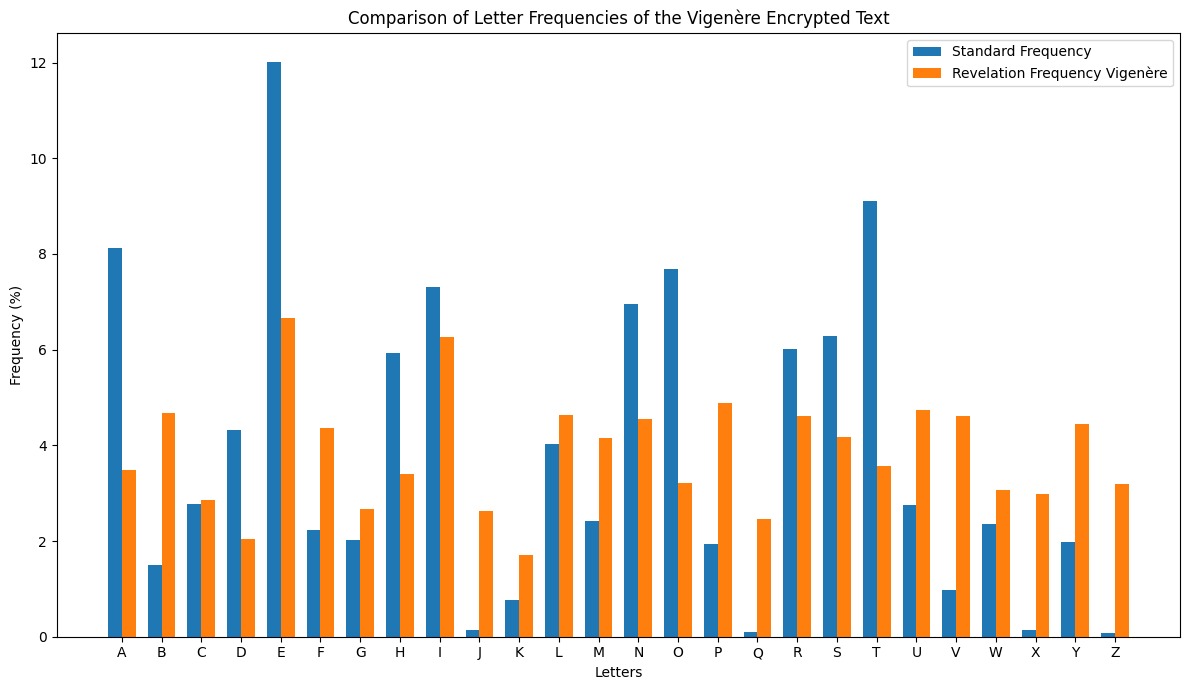

In [3]:
#| code-fold: true
def vigenere_chiffre(text: str, key: str, encrypt=True) -> str:
    """
    Implementiert die Vigenère-Verschlüsselung für einen gegebenen Klartext und
    Schlüssel.
    
    Args:
        klartext (str): Der zu verschlüsselnde Text schluessel (str): Das
        Schlüsselwort für die Verschlüsselung
    
    Returns:
        str: Der verschlüsselte Text
    """
    
    # initialisiere den resultierenden Text
    resulting_text = ''
    
    # bestimme die Schlüssellänge für die anschliessende Modulo-Operation
    key_length = len(key)
    
    # itererie über den Eingabetext unter gleichzeitiger Erfassung des Index
    for i, char in enumerate(text):
        # berechne den Zahlwert des Buchstabens aus der ascii Tabelle
        char_no = ord(char) - 97
        key_no = ord(key[i % key_length]) - 97
        
        if encrypt == True:
            # berechne den Zahlwert des verschlüsselten Buchstabens
            ciph_no = (char_no + key_no) % 26
        else:
            # berechne den Zahlwert des entschlüsselten Buchstabens
            ciph_no = (char_no + (26 - key_no)) % 26
            
         # übernehme das Zeichen aufgrund seines Zahlwertes aus der ascii Tabelle  
        ciph = chr(ciph_no + 97)
        
        # füge den Buchstaben am resultierenden Text an
        resulting_text += ciph
    return resulting_text

revelation_vigenere = vigenere_chiffre(cleaned_revelation.lower(), 'buelrain', encrypt=True)

revelation_vigenere_frequency = letter_frequency(revelation_vigenere.upper())
dft['Revelation Frequency Vigenere'] = pd.Series(revelation_vigenere_frequency)

# --- Erstellen Sie das Side-by-Side-Balkendiagramm ---
# Legen Sie die Breite der Balken fest
bar_width = 0.35

# Verwenden Sie den Index des transponierten DataFrames (dft)
x = np.arange(len(dft.index))

fig, ax = plt.subplots(figsize=(12, 7))

# Zeichnen Sie die Balken für die beiden Spalten aus dft
ax.bar(x - bar_width/2, dft['Standard Frequency'], bar_width, label='Standard Frequency')
ax.bar(x + bar_width/2, dft['Revelation Frequency Vigenere'], bar_width, label='Revelation Frequency Vigenère')

ax.set_xticks(x)
ax.set_xticklabels(dft.index)

ax.set_xlabel('Letters')
ax.set_ylabel('Frequency (%)')
ax.set_title('Comparison of Letter Frequencies of the Vigenère Encrypted Text')
ax.legend()
plt.tight_layout()

plt.show()

It is quite obvious that the distribution of letters in a
polyalphabetically encrypted text is significantly different from that in
normal text. The Vigenère cipher was therefore considered 'la chiffre
indéchiffrable' for about 300 years.

However, a special case of the Vigenère cipher is actually not
decipherable. This is the case when the key is longer than the plaintext.
This is called the "One-Time Pad".
